In [13]:
import pandas as pd
import numpy as np
import networkx as nx


# Define departments and skills required for each department
departments = {
    'HR': ['Communication', 'Recruitment', 'Employee Engagement', 'Conflict Resolution', 'Organizational Development', 'Excel'],
    'Data Science': ['Python', 'SQL', 'Machine Learning', 'Data Analysis', 'Statistics'],
    'Software Development': ['Java', 'C++', 'System Design', 'Algorithms', 'Debugging', 'Excel'],
    'IT': ['Networking', 'Cybersecurity', 'Hardware Management', 'Cloud Computing', 'System Administration']
}

# Create synthetic dataset for 1000 employees
np.random.seed(42)
num_employees = 1000

# Generate employee IDs
employee_ids = np.arange(1, num_employees + 1)

# Assign employees to departments randomly
department_assignment = np.random.choice(list(departments.keys()), num_employees)

# Seniority levels and experience
seniority_levels = ['Junior', 'Senior', 'Lead']
seniority_assignment = np.random.choice(seniority_levels, num_employees)

overall_experience = np.random.randint(1, 21, num_employees)

# Adjusting experience based on seniority level
for i in range(num_employees):
    if seniority_assignment[i] == 'Junior':
        overall_experience[i] = np.random.randint(1, 2)  # 1-2 years for Junior
    elif seniority_assignment[i] == 'Senior':
        overall_experience[i] = np.random.randint(3, 5)  # 3-5 years for Senior
    else:  # Lead
        overall_experience[i] = np.random.randint(6, 10)  # 6-10 years for Lead

# Adjust department experience to be a portion of the overall experience
department_experience = np.array([np.random.randint(1, min(exp, 10)+1) if np.random.rand() > 0.5 else 0 for exp in overall_experience])

# Re-adjust skill ratings to be between 1 and 10
# Initialize employee skill ratings (all zeros)
skills = list(set([skill for skillset in departments.values() for skill in skillset]))  # All unique skills

employee_data = pd.DataFrame(0, index=employee_ids, columns=skills)
# Adjusting department experience and skill ratings for Senior and Lead roles
for i in range(num_employees):
    if seniority_assignment[i] == 'Senior':
        # Senior roles should have more department experience and higher skill ratings
        department_experience[i] = np.random.randint(3, min(overall_experience[i], 5) + 1)  # 4-10 years of department experience
        skillset = departments[department_assignment[i]]
        for skill in skillset:
            employee_data.loc[employee_ids[i], skill] = np.random.randint(6, 10)  # Strong skill rating between 6 and 9
    elif seniority_assignment[i] == 'Lead':
        # Lead roles should have significant department experience and the highest skill ratings
        department_experience[i] = np.random.randint(6, min(overall_experience[i], 10) + 1)  # 6-10 years of department experience
        skillset = departments[department_assignment[i]]
        for skill in skillset:
            employee_data.loc[employee_ids[i], skill] = np.random.randint(8, 11)  # Strong skill rating between 8 and 10
    else:
        # For Junior roles, keep experience and skills moderate
        department_experience[i] = np.random.randint(1, min(overall_experience[i], 2) + 1) if overall_experience[i] > 1 else 1
        skillset = departments[department_assignment[i]]
        for skill in skillset:
            employee_data.loc[employee_ids[i], skill] = np.random.randint(0, 10)  # Strong skill rating between 0 and 10

# Update the dataframe with adjusted department experience
employee_data['Department_Experience'] = department_experience

# Update columns for employee details
employee_data['Employee_ID'] = employee_ids
employee_data['Department'] = department_assignment
employee_data['Seniority_Level'] = seniority_assignment
employee_data['Overall_Experience'] = overall_experience
employee_data['Department_Experience'] = department_experience

# Reorder columns
employee_data = employee_data[['Employee_ID', 'Department', 'Seniority_Level', 'Overall_Experience', 'Department_Experience'] + skills]


# Show the first few rows of the updated dataset
employee_data.head()



,Employee_ID,Department,Seniority_Level,Overall_Experience,Department_Experience,Debugging,Excel,System Administration,Networking,Hardware Management,...,Java,Algorithms,Machine Learning,Data Analysis,Cloud Computing,Python,Statistics,Recruitment,Organizational Development,SQL
1,1,Software Development,Senior,3,3,7,7,0,0,0,...,9,9,0,0,0,0,0,0,0,0
2,2,IT,Lead,9,6,0,0,10,10,9,...,0,0,0,0,10,0,0,0,0,0
3,3,HR,Junior,1,1,0,2,0,0,0,...,0,0,0,0,0,0,0,4,8,0
4,4,Software Development,Junior,1,1,0,6,0,0,0,...,2,9,0,0,0,0,0,0,0,0
5,5,Software Development,Junior,1,1,6,4,0,0,0,...,8,3,0,0,0,0,0,0,0,0


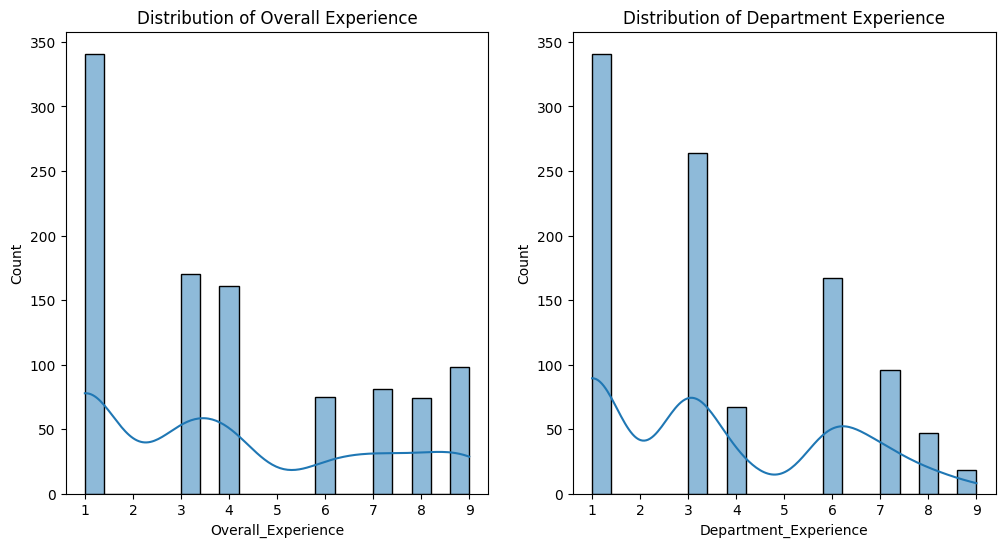

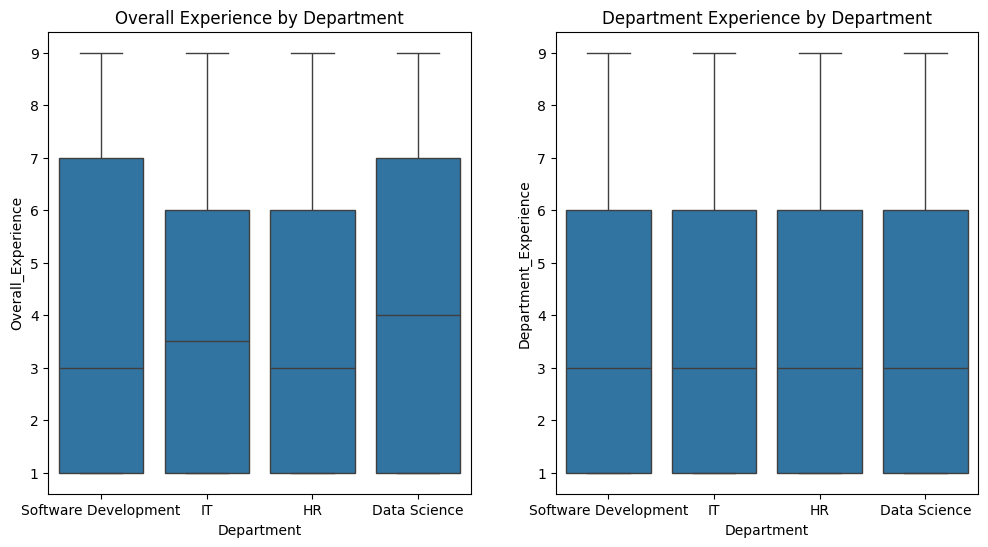

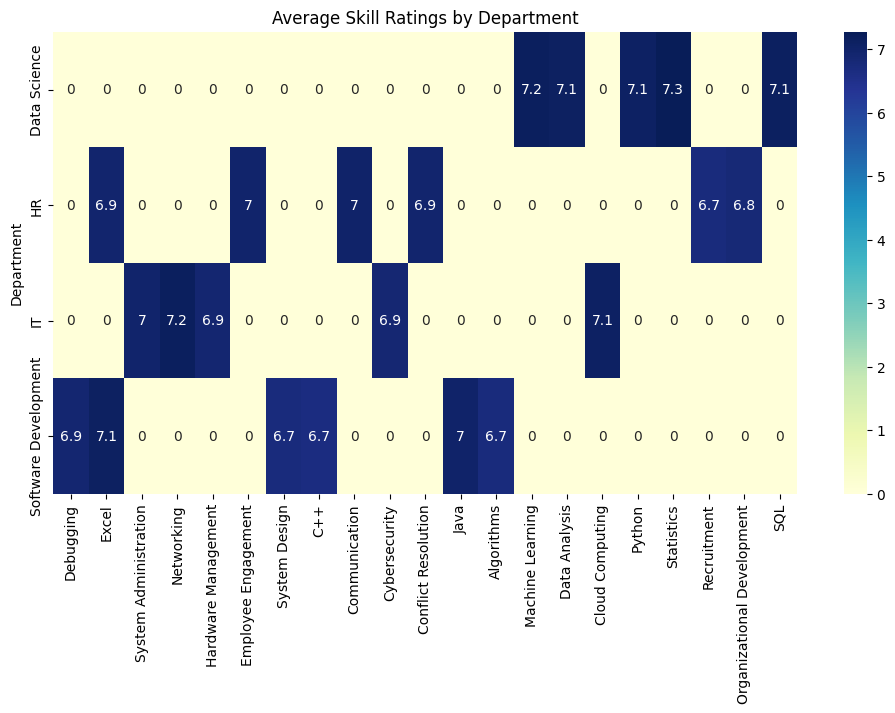

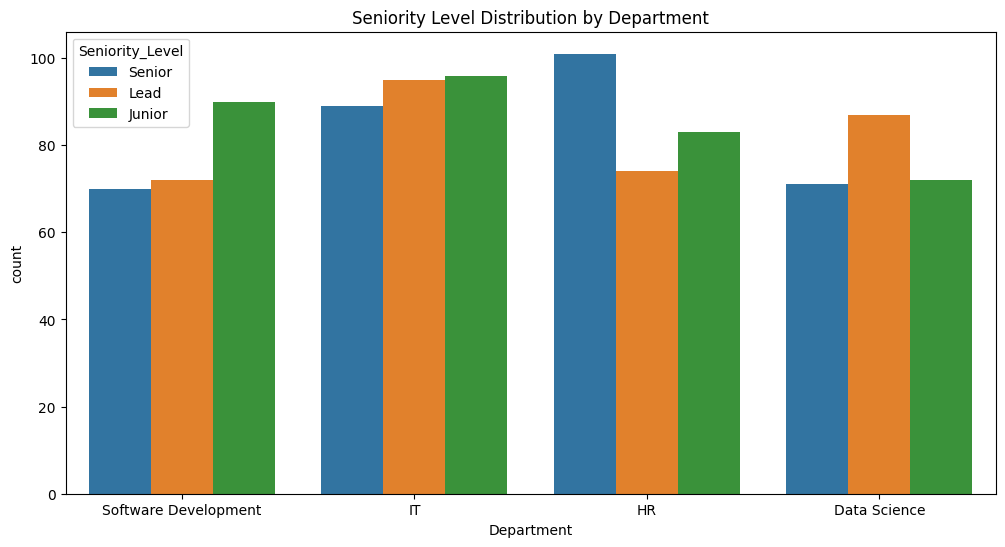

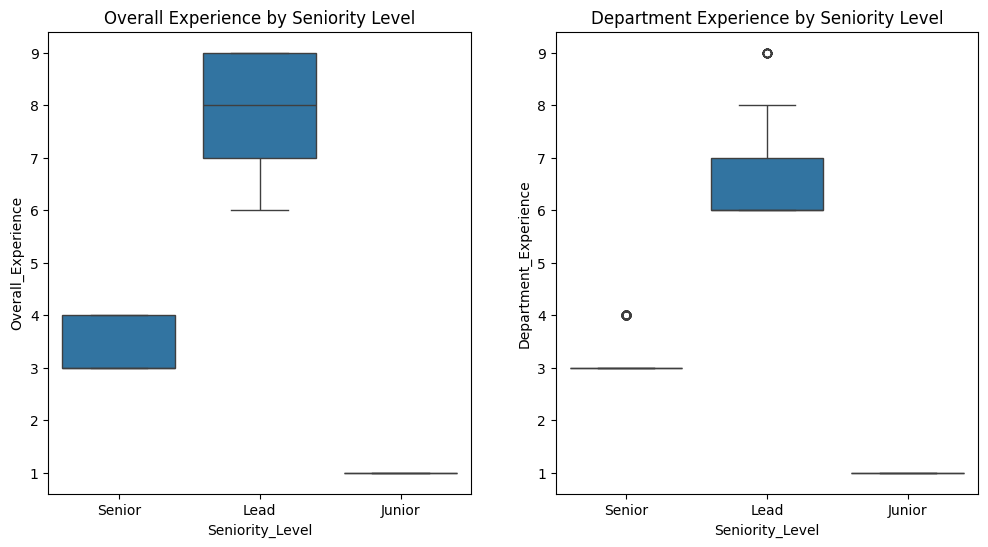

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Overall Experience and Department Experience
plt.figure(figsize=(12, 6))

# Overall Experience distribution
plt.subplot(1, 2, 1)
sns.histplot(employee_data['Overall_Experience'], kde=True, bins=20)
plt.title('Distribution of Overall Experience')

# Department Experience distribution
plt.subplot(1, 2, 2)
sns.histplot(employee_data['Department_Experience'], kde=True, bins=20)
plt.title('Distribution of Department Experience')

plt.show()

# Boxplots to see the experience distribution by department
plt.figure(figsize=(12, 6))

# Overall experience by department
plt.subplot(1, 2, 1)
sns.boxplot(x='Department', y='Overall_Experience', data=employee_data)
plt.title('Overall Experience by Department')

# Department experience by department
plt.subplot(1, 2, 2)
sns.boxplot(x='Department', y='Department_Experience', data=employee_data)
plt.title('Department Experience by Department')

plt.show()

# Skills analysis: Average skill ratings per department
skill_avg_per_dept = employee_data.groupby('Department')[skills].mean()

# Visualizing the average skill ratings for each department
plt.figure(figsize=(12, 6))
sns.heatmap(skill_avg_per_dept, annot=True, cmap='YlGnBu')
plt.title('Average Skill Ratings by Department')
plt.show()

# Seniority Level Analysis
plt.figure(figsize=(12, 6))

# Seniority level distribution across departments
sns.countplot(x='Department', hue='Seniority_Level', data=employee_data)
plt.title('Seniority Level Distribution by Department')
plt.show()

# Compare experience across seniority levels
plt.figure(figsize=(12, 6))

# Overall experience by seniority
plt.subplot(1, 2, 1)
sns.boxplot(x='Seniority_Level', y='Overall_Experience', data=employee_data)
plt.title('Overall Experience by Seniority Level')

# Department experience by seniority
plt.subplot(1, 2, 2)
sns.boxplot(x='Seniority_Level', y='Department_Experience', data=employee_data)
plt.title('Department Experience by Seniority Level')

plt.show()



Seniority_Level          Junior       Lead     Senior
Department                                           
Data Science          31.304348  37.826087  30.869565
HR                    32.170543  28.682171  39.147287
IT                    34.285714  33.928571  31.785714
Software Development  38.793103  31.034483  30.172414


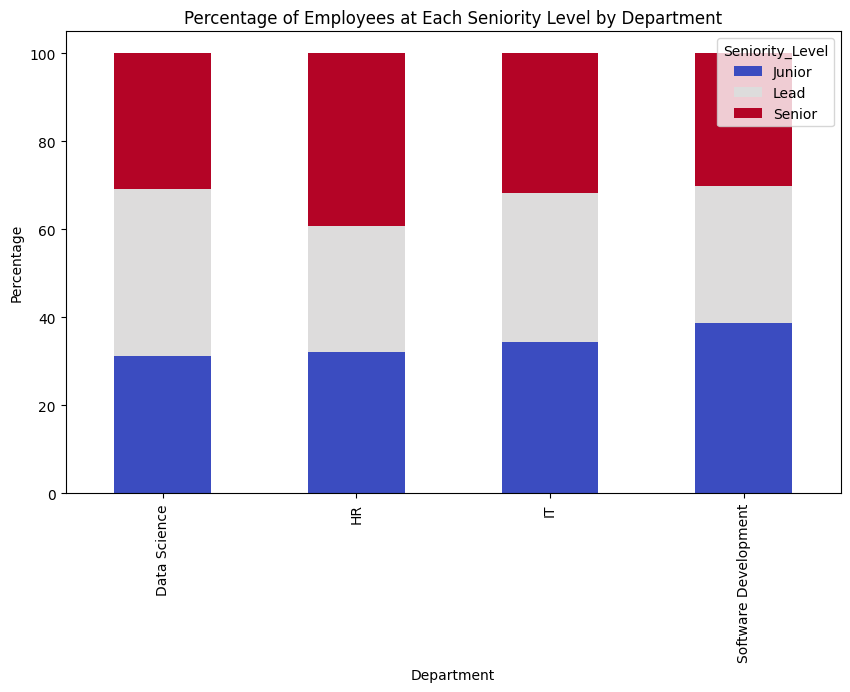

In [15]:
# Calculate the counts of employees at each seniority level within each department
seniority_counts = employee_data.groupby(['Department', 'Seniority_Level']).size().reset_index(name='Count')

# Calculate the total number of employees in each department
department_counts = employee_data.groupby('Department').size().reset_index(name='Total')

# Merge the two dataframes to calculate percentages
seniority_percentages = pd.merge(seniority_counts, department_counts, on='Department')
seniority_percentages['Percentage'] = (seniority_percentages['Count'] / seniority_percentages['Total']) * 100

# Pivot the data to get a better view
seniority_percentages_pivot = seniority_percentages.pivot(index='Department', columns='Seniority_Level', values='Percentage').fillna(0)

# Display the result
print(seniority_percentages_pivot)

# Plotting the percentage distribution
seniority_percentages_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Percentage of Employees at Each Seniority Level by Department')
plt.ylabel('Percentage')
plt.xlabel('Department')
plt.show()


In [16]:
employee_data.to_csv("employee_data.csv")

In [17]:
employee_data[employee_data["Overall_Experience"]==0]

,Employee_ID,Department,Seniority_Level,Overall_Experience,Department_Experience,Debugging,Excel,System Administration,Networking,Hardware Management,...,Java,Algorithms,Machine Learning,Data Analysis,Cloud Computing,Python,Statistics,Recruitment,Organizational Development,SQL


In [18]:
employee_data[(employee_data["Overall_Experience"]==0) & (employee_data["Department_Experience"]>0)]

,Employee_ID,Department,Seniority_Level,Overall_Experience,Department_Experience,Debugging,Excel,System Administration,Networking,Hardware Management,...,Java,Algorithms,Machine Learning,Data Analysis,Cloud Computing,Python,Statistics,Recruitment,Organizational Development,SQL


In [19]:
employee_data[(employee_data["Overall_Experience"]>employee_data["Department_Experience"])]

,Employee_ID,Department,Seniority_Level,Overall_Experience,Department_Experience,Debugging,Excel,System Administration,Networking,Hardware Management,...,Java,Algorithms,Machine Learning,Data Analysis,Cloud Computing,Python,Statistics,Recruitment,Organizational Development,SQL
2,2,IT,Lead,9,6,0,0,10,10,9,...,0,0,0,0,10,0,0,0,0,0
11,11,Software Development,Lead,9,8,10,8,0,0,0,...,9,9,0,0,0,0,0,0,0,0
13,13,Software Development,Senior,4,3,9,8,0,0,0,...,7,8,0,0,0,0,0,0,0,0
15,15,IT,Lead,9,8,0,0,9,9,8,...,0,0,0,0,9,0,0,0,0,0
17,17,IT,Lead,9,8,0,0,10,10,9,...,0,0,0,0,8,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,989,Data Science,Lead,7,6,0,0,0,0,0,...,0,0,8,9,0,8,8,0,0,9
990,990,IT,Lead,9,8,0,0,9,8,10,...,0,0,0,0,8,0,0,0,0,0
991,991,Data Science,Senior,4,3,0,0,0,0,0,...,0,0,9,6,0,6,8,0,0,9
993,993,Data Science,Senior,4,3,0,0,0,0,0,...,0,0,7,7,0,6,8,0,0,9


In [20]:
employee_data[(employee_data["Overall_Experience"]<employee_data["Department_Experience"])]

,Employee_ID,Department,Seniority_Level,Overall_Experience,Department_Experience,Debugging,Excel,System Administration,Networking,Hardware Management,...,Java,Algorithms,Machine Learning,Data Analysis,Cloud Computing,Python,Statistics,Recruitment,Organizational Development,SQL


In [21]:
employee_data[employee_data["Seniority_Level"]=="Lead"]["Overall_Experience"].unique()

array([9, 7, 6, 8])

In [22]:
employee_data[employee_data["Seniority_Level"]=="Senior"]["Overall_Experience"].unique()

array([3, 4])

{'HR': {'Excel': 7.0, 'Employee Engagement': 7.0, 'Communication': 7.0, 'Conflict Resolution': 7.0, 'Recruitment': 7.0, 'Organizational Development': 7.0}, 'Data Science': {'Machine Learning': 7.0, 'Data Analysis': 7.0, 'Python': 8.0, 'Statistics': 7.0, 'SQL': 7.0}, 'Software Development': {'Debugging': 7.0, 'Excel': 7.0, 'System Design': 7.0, 'C++': 7.0, 'Java': 7.0, 'Algorithms': 7.0}, 'IT': {'System Administration': 7.0, 'Networking': 7.0, 'Hardware Management': 7.0, 'Cybersecurity': 7.0, 'Cloud Computing': 7.0}}
{'HR': {'weighted_average_overall_exp': 7.0, 'weighted_average_dept_exp': 6.0, 'overall_experience_distribution': [1, 1, 1, 1, 6.0, 18, 1, 12, 4.5, 14, 1, 1, 6.0, 6.0, 6.0, 1, 6.0, 4.5, 4.5, 12, 14, 1, 1, 14, 1, 1, 4.5, 1, 4.5, 6.0, 1, 1, 12, 12, 1, 14, 1, 12, 4.5, 1, 6.0, 18, 16, 1, 1, 14, 6.0, 4.5, 6.0, 12, 18, 14, 1, 1, 6.0, 1, 18, 12, 4.5, 1, 6.0, 1, 12, 6.0, 1, 4.5, 6.0, 16, 4.5, 6.0, 14, 6.0, 1, 4.5, 12, 4.5, 6.0, 6.0, 12, 6.0, 1, 1, 1, 16, 4.5, 1, 1, 1, 1, 14, 6.0, 1

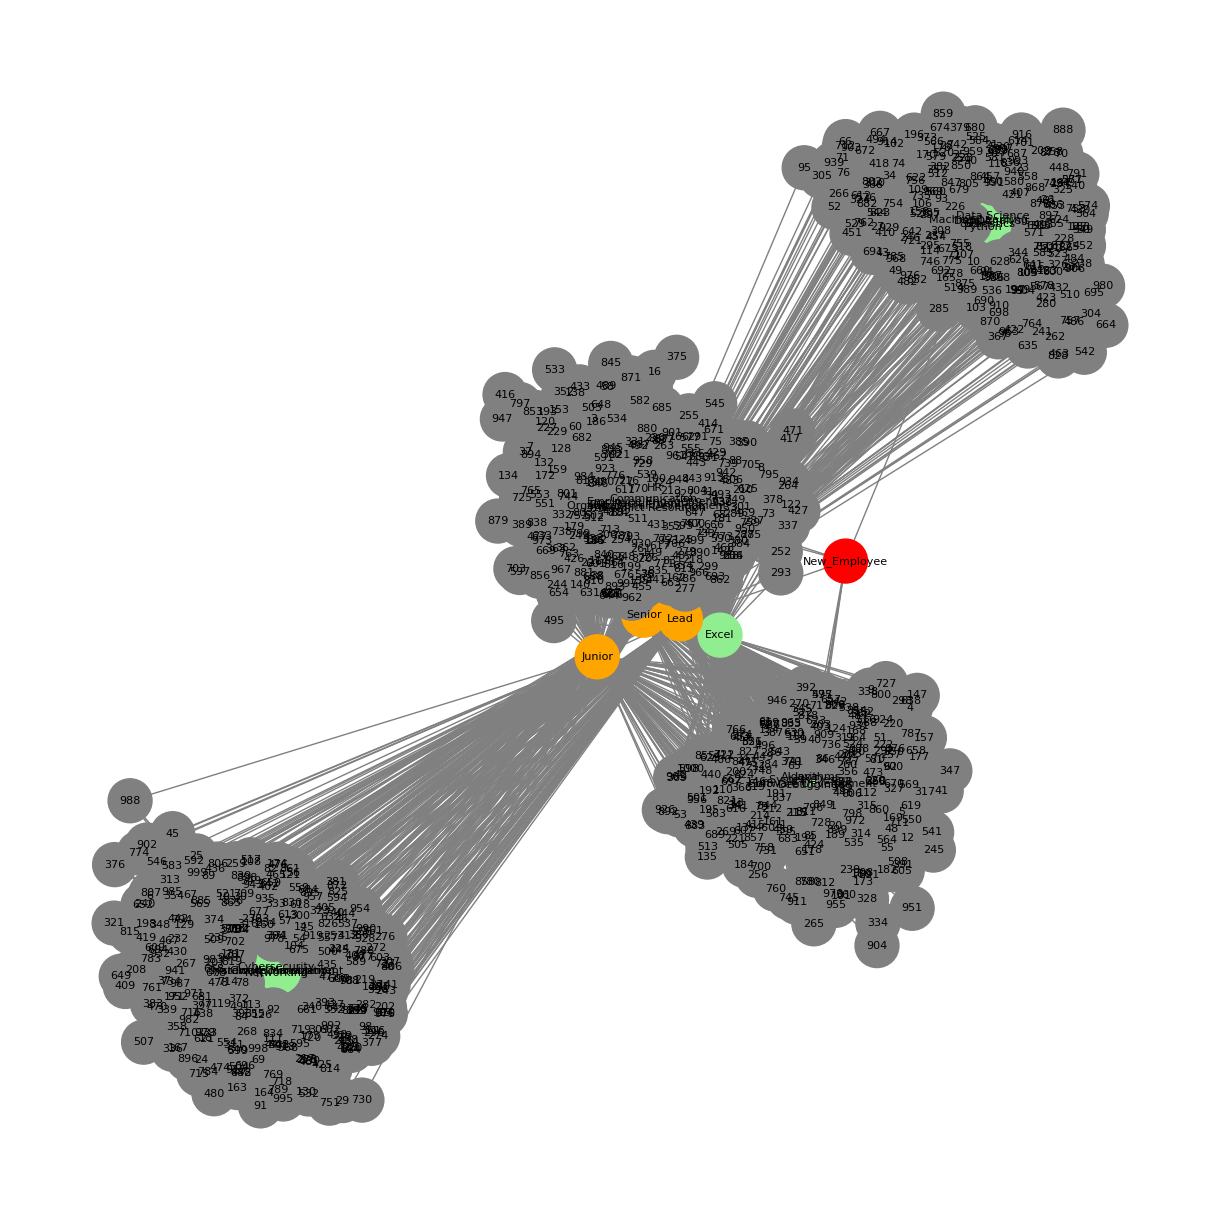

CPU times: user 9.66 s, sys: 160 ms, total: 9.82 s
Wall time: 9.9 s


In [23]:
%%time
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Seniority levels with weights
# A dictionary to assign weights for different seniority levels.
# These weights are used to give higher importance to employees with senior roles when calculating experience-based scores.
seniority_weights = {'Junior': 1, 'Senior': 1.5, 'Lead': 2}
# This weighting reflects the assumption that more senior employees contribute more to the overall experience in a department than junior employees do.

# Create knowledge graph
G = nx.Graph()

# Adding nodes for departments, skills, and seniority levels
skills = list(set([skill for skillset in departments.values() for skill in skillset]))  # All unique skills
seniority_levels = ['Junior', 'Senior', 'Lead']

# Adding department nodes
for dept in departments.keys():
    G.add_node(dept, node_type='Department')

# Adding skill nodes
for skill in skills:
    G.add_node(skill, node_type='Skill')

# Adding seniority level nodes
for seniority in seniority_levels:
    G.add_node(seniority, node_type='Seniority')

# Adding employee nodes and connecting them to skills, departments, and seniority levels
# Loops through the employee_data DataFrame, retrieving details of each employee such as their ID,
# department, seniority level, overall experience, and department-specific experience.
for i, row in employee_data.iterrows():
    employee_id = row['Employee_ID']
    department = row['Department']
    seniority = row['Seniority_Level']
    overall_exp = row['Overall_Experience']
    dept_exp = row['Department_Experience']

    # Add employee node
    # Adds a node for each employee, labeling it as Employee
    # and storing attributes like overall experience, department experience, and seniority level.
    G.add_node(employee_id, node_type='Employee', overall_exp=overall_exp, dept_exp=dept_exp, seniority=seniority)

    # Add edges between employee and department, seniority
    # Adds a node for each employee, labeling it as Employee
    # and storing attributes like overall experience, department experience, and seniority level.
    G.add_edge(employee_id, department, relation='works_in')
    G.add_edge(employee_id, seniority, relation='has_seniority')

    # Add edges between employee and skills with their ratings
    # For each employee, creates edges to the skills they possess.
    # The edge weight represents the employee's rating for that skill.
    for skill in skills:
        if row[skill] > 0:
            G.add_edge(employee_id, skill, relation='has_skill', weight=row[skill])

# Calculate average skill ratings for each department
# Initializes a dictionary to store the average skill ratings for each department.
# For each department, it identifies the employees associated with that department
# by checking if there's an edge between the employee and the department.
department_skill_avgs = {}
for dept in departments:
    department_skill_avgs[dept] = {}
    employees_in_dept = [n for n, attr in G.nodes(data=True) if attr.get('node_type') == 'Employee' and G.has_edge(n, dept)]

    for skill in skills:
      # For each skill, it collects the ratings from all employees in the department who have that skill.
        skill_ratings = []
        for emp in employees_in_dept:
            if G.has_edge(emp, skill):
                skill_ratings.append(G[emp][skill]['weight'])

        if skill_ratings:
          # If there are skill ratings for the department, it calculates the average rating,
          # stores it, and creates an edge between the department and the skill, where the edge weight represents the average rating.
            avg_rating = np.round(np.mean(skill_ratings))
            department_skill_avgs[dept][skill] = avg_rating
            # Add edge between department and skill with avg rating
            G.add_edge(dept, skill, relation='requires_skill', weight=avg_rating)
print(department_skill_avgs)

# Calculate average experience levels for each department, considering seniority level
# Initializes a dictionary to store average experience levels for each department and identifies employees working in the department.
department_experience_avgs = {}
for dept in departments:
    employees_in_dept = [n for n, attr in G.nodes(data=True) if attr.get('node_type') == 'Employee' and G.has_edge(n, dept)]

    overall_exp_weighted = []
    dept_exp_weighted = []

    for emp in employees_in_dept:
      # Collects weighted overall and department-specific experience values for employees based on their seniority level.
        emp_seniority = G.nodes[emp]['seniority']
        weight = seniority_weights[emp_seniority]

        overall_exp_weighted.append(G.nodes[emp]['overall_exp'] * weight)
        dept_exp_weighted.append(G.nodes[emp]['dept_exp'] * weight)

    # Save weighted averages and also the distribution of overall experience
    # Stores the weighted average overall and department experience for each department.
    #  The experience distribution is also saved for percentile-based seniority determination.
    department_experience_avgs[dept] = {
        'weighted_average_overall_exp': np.round(np.mean(overall_exp_weighted)),
        'weighted_average_dept_exp': np.round(np.mean(dept_exp_weighted)),
        'overall_experience_distribution': overall_exp_weighted  # Store distribution for percentile calculations
    }
print(department_experience_avgs)

# Function to calculate best-fit department and seniority level
def calculate_best_fit(new_employee_skills, new_employee_exp, new_employee_dept_exp):
    best_fit_dept = None
    best_fit_seniority = None
    best_fit_score = -float('inf')
    improvement_needed = {}
    missing_skills = []

    for dept, skill_avgs in department_skill_avgs.items():
        skill_score = 0
        improvement_needed[dept] = {}
        missing_skills_for_dept = []

        for skill, avg_rating in skill_avgs.items():
          # Compares the new employee's skill rating with the department's average.
            new_emp_skill_rating = new_employee_skills.get(skill, 0)   # Here, new_employee_skills is a dictionary that contains the ratings of the new employee's skills.
          # The get() method is used to retrieve the rating for the current skill. If the skill isn't found in new_employee_skills, it defaults to 0.



            # This line iterates over each skill in the skill_avgs dictionary,
            #  where skill is the name of the skill, and avg_rating is the average rating for that skill across the employees in the department.
            if new_emp_skill_rating > 0:   #This checks if the new employee has a rating for the current skill.
                                          #If the rating is greater than 0, it means the employee possesses this skill.
                skill_score += min(new_emp_skill_rating, avg_rating)

                # This line calculates the contribution of the current skill to the overall skill score.
                # min(new_emp_skill_rating, avg_rating) is used to ensure that the contribution to the skill
                # score does not exceed the average requirement of the department. For example:
                # If the new employee has a skill rating of 4 and the department's average rating for that skill
                # is 5, the contribution to the skill score is 4.
                # If the new employee has a skill rating of 6 and the department's average rating for that skill
                #  is 5, the contribution to the skill score is capped at 5.

                if new_emp_skill_rating < avg_rating:
                    improvement_needed[dept][skill] = avg_rating - new_emp_skill_rating
            else:
                missing_skills_for_dept.append(skill)

        # Experience score, considering seniority levels
        # Calculates an experience score by comparing the new employee's experience to the department's average experience.
        experience_score = min(new_employee_exp, department_experience_avgs[dept]['weighted_average_overall_exp']) + \
                           min(new_employee_dept_exp, department_experience_avgs[dept]['weighted_average_dept_exp'])
        print(min(new_employee_exp, department_experience_avgs[dept]['weighted_average_overall_exp']))
        print(min(new_employee_dept_exp, department_experience_avgs[dept]['weighted_average_dept_exp']))

        # Total score = skill score + experience score
        total_score = skill_score + experience_score
        print(dept)
        print("total_score = skill_score + experience_score")
        print(f'{total_score} = {skill_score} + {experience_score}')

        print()
        if total_score > best_fit_score:
            best_fit_score = total_score
            best_fit_dept = dept
            missing_skills = missing_skills_for_dept

            # Suggest seniority level based on percentiles of overall experience in the department
            dept_experience_distribution = department_experience_avgs[dept]['overall_experience_distribution']
            percentile_50 = np.percentile(dept_experience_distribution, 25)  # Q1
            percentile_75 = np.percentile(dept_experience_distribution, 50)  # Median

            if new_employee_exp >= percentile_75:
                best_fit_seniority = 'Lead'
            elif new_employee_exp >= percentile_50:
                best_fit_seniority = 'Senior'
            else:
                best_fit_seniority = 'Junior'

    return best_fit_dept, best_fit_seniority, improvement_needed[best_fit_dept], missing_skills

# Adding new employee and calculating best-fit department and seniority level
new_employee_skills = {'Python': 8, 'Java': 7, 'Algorithms': 6, 'Debugging': 8, 'Communication':10, 'Conflict Resolution':4}  # Example skills
new_employee_exp = 9  # Overall experience
new_employee_dept_exp = 6  # Department experience

new_employee_id = 'New_Employee'
print(new_employee_id, new_employee_exp, new_employee_dept_exp, new_employee_skills)
G.add_node(new_employee_id, node_type='Employee', overall_exp=new_employee_exp, dept_exp=new_employee_dept_exp)

for skill, rating in new_employee_skills.items():
    G.add_edge(new_employee_id, skill, relation='has_skill', weight=rating)

# Get best-fit department and seniority level
best_fit_dept, best_fit_seniority, improvement_needed_skills, missing_skills = calculate_best_fit(new_employee_skills, new_employee_exp, new_employee_dept_exp)

# Add best-fit department and seniority level for the new employee
G.add_edge(new_employee_id, best_fit_dept, relation='best_fit')
G.add_edge(new_employee_id, best_fit_seniority, relation='best_fit_seniority')

print("--------------------------------------------------------------------------------------------------------------------")
print(f"Best fit department for the new employee: {best_fit_dept}")
print(f"Best fit seniority level for the new employee: {best_fit_seniority}")
print(f"Skills that need improvement: {improvement_needed_skills}")
print(f"Missing skills: {missing_skills}")

# Visualizing the knowledge graph
pos = nx.spring_layout(G)

# Color nodes based on type
node_colors = []
for node in G.nodes(data=True):
    if node[1]['node_type'] == 'Department':
        node_colors.append('lightblue')
    elif node[1]['node_type'] == 'Skill':
        node_colors.append('lightgreen')
    elif node[1]['node_type'] == 'Seniority':
        node_colors.append('orange')
    elif node[0] == new_employee_id:
        node_colors.append('red')  # Highlight new employee
    else:
        node_colors.append('grey')

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1000, font_size=8, font_color='black', edge_color='grey')
plt.show()


In [24]:
# n=100 - 979ms
# n=1,000- 12.7 s
# n=10,000-
#n=5,000- 1 min 52 secs